In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import random
import math
import numpy as np
import statistics 
import scipy.io
from scipy.stats import norm
mat = scipy.io.loadmat('a1digits.mat')


test_data = np.array(mat['digits_test']) 
training_data = np.array(mat['digits_train'])    

test_data.shape
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

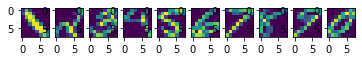

In [4]:
imgs = []
for i in range(0,10):
        temp = training_data[:,0,i] 
        temp = temp.reshape(8,8)
        imgs.append(temp)

counter = 0 
f, axarr = plt.subplots(1,10)
for img in imgs: 
    axarr[counter].imshow(img)
    counter +=1

In [5]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = np.sum(data)/700
    
    sigma = np.std(data)
    #print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return [dist,mu,sigma]
 

In [6]:
# sort data into classes
prior_dist = []
for i in range(0,10): 
    prior_dist.append(.10)
                  
print (prior_dist) 

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [19]:
gaus_dist = [[] for i in range(10)]
mu = [[] for i in range(10)]
sigma = 0.0
for Class in range(0,10):
    for feature in range (64):
        estimate = fit_distribution(training_data[feature,:,Class])
        gaus_dist[Class].append(estimate[0])
        mu[Class].append(estimate[1])
        
for Class in range(0,10):
    for row in range(0,64):
        for column in range(0,700): 
           sigma += (training_data[row,column,Class] - mu[Class][row])**2


sigma = sigma/(7000)

In [29]:
counter = 0
count_False = 0
count_True = 0 
for cl in range(10):
    while counter < 400 :
        sample_probs = []
        for Class in range(10):
                  sample_probs.append(((((2*math.pi*sigma)**-10)*math.exp((-1/(2*sigma))*(np.sum((test_data[i,counter,cl] - mu[Class][i])**2 for i in range(63)))))*.1))
        counter += 1
        sample_check = max(sample_probs)
        max_index = sample_probs.index(sample_check)
        if cl == max_index:
            print("the algorithm was able to accurately predict the class of the image: " + str(max_index))
            count_True += 1
        else: 
            print("the algorithm incorrectly classified the image " + str(max_index) + " should have been: " + str(cl))
            count_False += 1
        sample_probs = []
    counter = 0 
print("The accuracy of this algorithm is: " + str((count_True/1000)*100))

the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the algorithm was able to accurately predict the class of the image: 0
the al

In [ ]:
result = []
count = 0
count_False = 0
count_True = 0 
for cl1 in range(10):
    for testVector in np.transpose(test_data[:,:,cl1]):
        count = 0
        sample_probs = []
        for cl2 in range(10):
            sample_probs.append(np.prod([gaus_dist[cl2][i].pdf(testVector[i]) for i in range(64)])*.1)
            
        sample_check = max(sample_probs)
        max_index = sample_probs.index(sample_check)
        if cl1 == max_index:
            print("the algorithm was able to accurately predict the class of the image: " + str(max_index))
            count_True += 1
        else: 
            print("the algorithm incorrectly classified the image " + str(max_index) + " should have been: " + str(cl1))
            count_False += 1
    
        result.append(sample_probs)
        sample_probs = []
print("The accuracy of this algorithm is: " + str((count_True/4000)*100))

In [ ]:
for i in range(10):
    sample_check = max(result[i])
    max_index = result[i].index(sample_check)
    print("This sample image belongs to class: " + str(max_index + 1))
    
    temp = np.transpose(test_data[:,:,0])[0] 
    temp = temp.reshape(8,8)
    plt.imshow(temp)
    
f, axarr = plt.subplots(1,10)
for img in imgs: 
    axarr[counter].imshow(img)
    counter +=1

temp = np.transpose(test_data[:,:,0])[0] 
temp = temp.reshape(8,8)
plt.imshow(temp)
